## 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_path = r"C:\Users\Misbah\Desktop\flights-sagemaker-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


### 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-04-29 10:20:00,2024-04-29 11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,2024-04-29 09:00:00,2024-04-29 07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,2024-04-29 09:10:00,2024-04-29 11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,2024-04-29 20:20:00,2024-04-29 22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,2024-04-29 17:00:00,2024-04-29 10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,2024-04-29 04:55:00,2024-04-29 07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,2024-04-29 09:35:00,2024-04-29 21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,2024-04-29 06:05:00,2024-04-29 08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,2024-04-29 08:45:00,2024-04-29 21:00:00,735,1.0,No Info,7670


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.773438,0.792188,9075.418750
std,502.047906,0.654060,4328.022872
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5636.250000
50%,505.000000,1.000000,8372.000000
75%,956.250000,1.000000,12386.750000
max,2565.000000,3.000000,34273.000000


In [8]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,248,263,263,351.0,488


## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [10]:
temp = pd.read_csv(r"C:\Python Programs\datasets\titanic.csv")

eda_helper_functions.missing_info(temp)

,count,percentage
variable,,
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


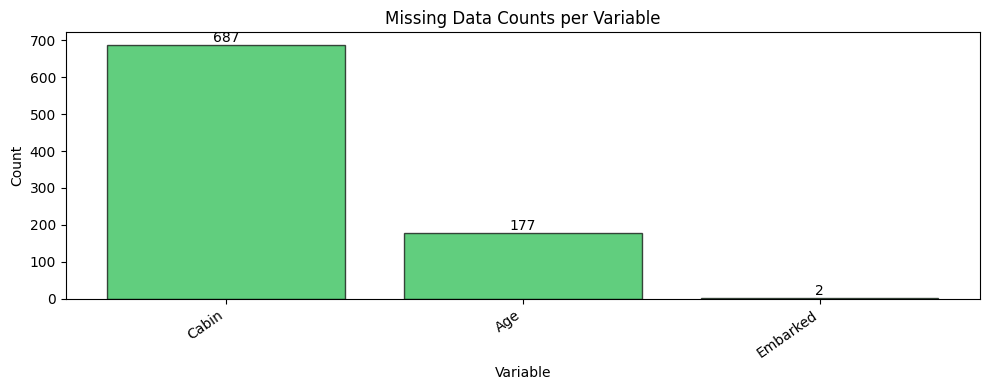

In [11]:
eda_helper_functions.plot_missing_info(temp)

## 5. High-level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-04-29 10:20:00,2024-04-29 11:50:00,90,0.0,In-flight meal not included,4995,-1
1,Air India,2019-05-18,Delhi,Cochin,2024-04-29 09:00:00,2024-04-29 07:40:00,1360,1.0,No Info,8372,-1
2,Air India,2019-06-12,Kolkata,Banglore,2024-04-29 09:10:00,2024-04-29 11:05:00,1555,2.0,No Info,6117,-1
3,Vistara,2019-04-01,Kolkata,Banglore,2024-04-29 20:20:00,2024-04-29 22:55:00,1595,1.0,No Info,7770,-1
4,Vistara,2019-06-06,Kolkata,Banglore,2024-04-29 17:00:00,2024-04-29 10:45:00,1065,1.0,No Info,9187,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-05-09,Mumbai,Hyderabad,2024-04-29 05:45:00,2024-04-29 07:15:00,90,0.0,No check-in baggage included,1965,-1
627,Air India,2019-03-21,Delhi,Cochin,2024-04-29 19:45:00,2024-04-29 19:15:00,1410,2.0,No Info,8236,-1
630,Air India,2019-05-12,Kolkata,Banglore,2024-04-29 10:00:00,2024-04-29 01:20:00,920,2.0,No Info,13243,-1
632,Jet Airways,2019-03-24,Kolkata,Banglore,2024-04-29 21:10:00,2024-04-29 22:35:00,1525,1.0,In-flight meal not included,10031,-1


## 6. Pair Plots

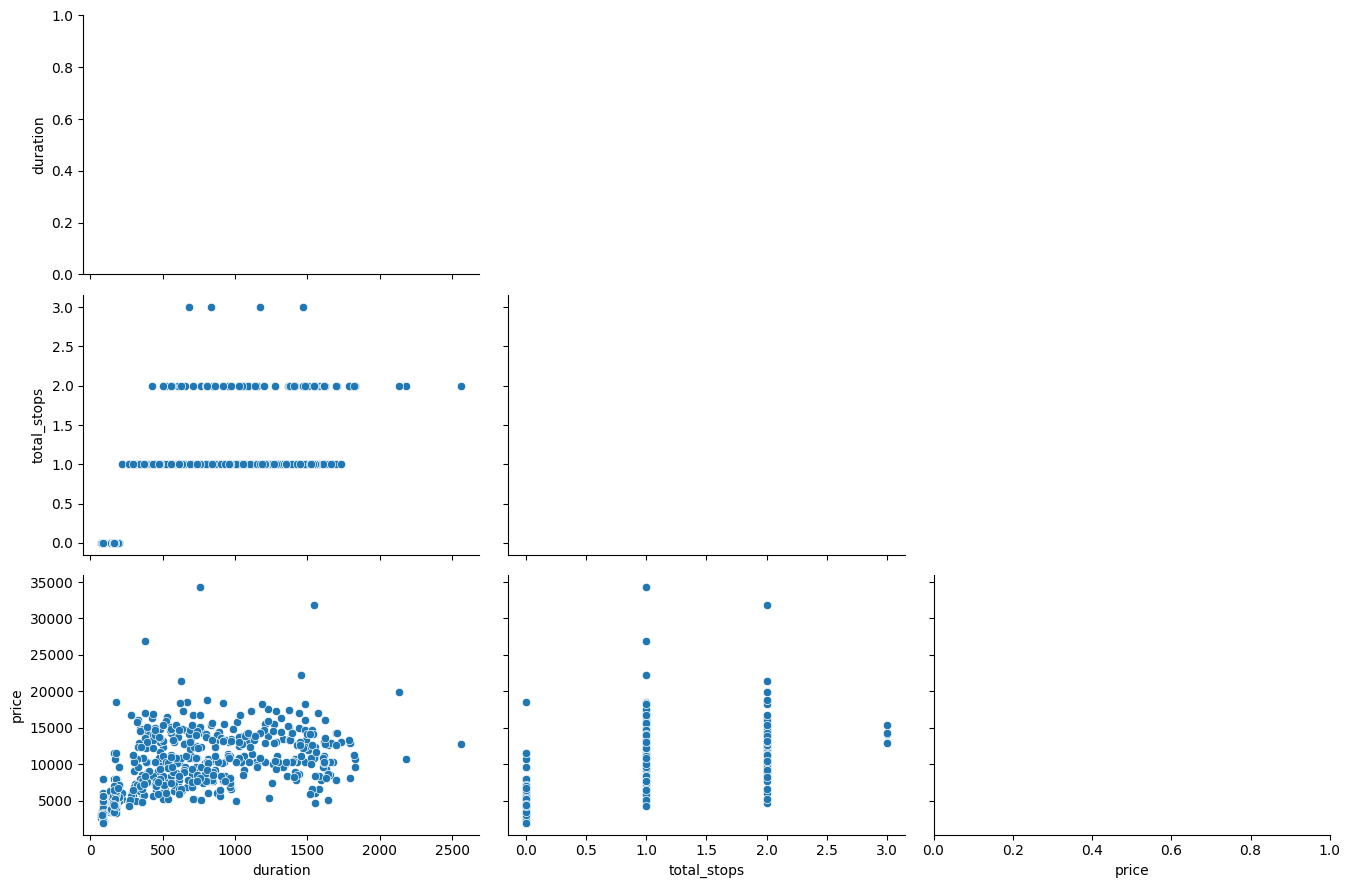

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

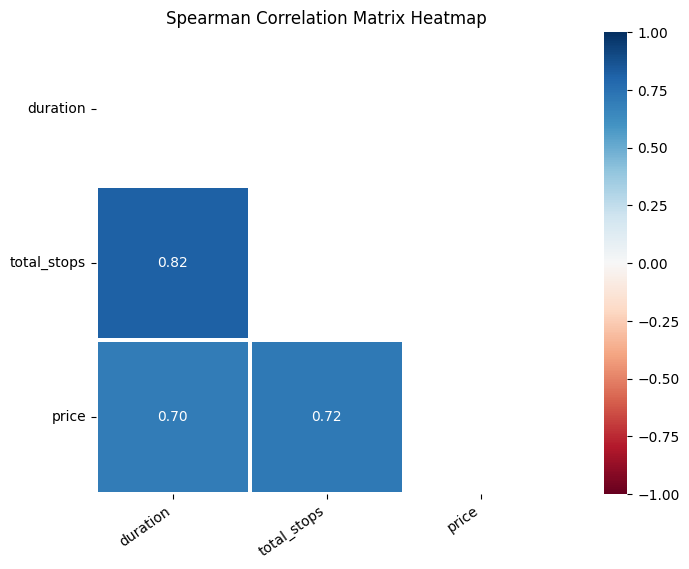

In [15]:
eda_helper_functions.correlation_heatmap(train)

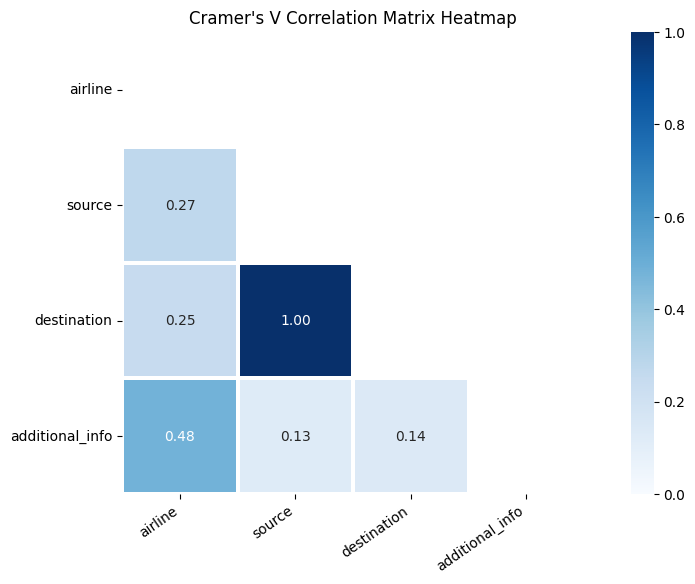

In [16]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [17]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [18]:
train.airline

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [19]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,248


,count,percentage
category,,
Jet Airways,248,0.387500
Indigo,115,0.179688
Air India,102,0.159375
Multiple Carriers,68,0.106250
Spicejet,40,0.062500
Vistara,36,0.056250
Air Asia,18,0.028125
Goair,13,0.020313


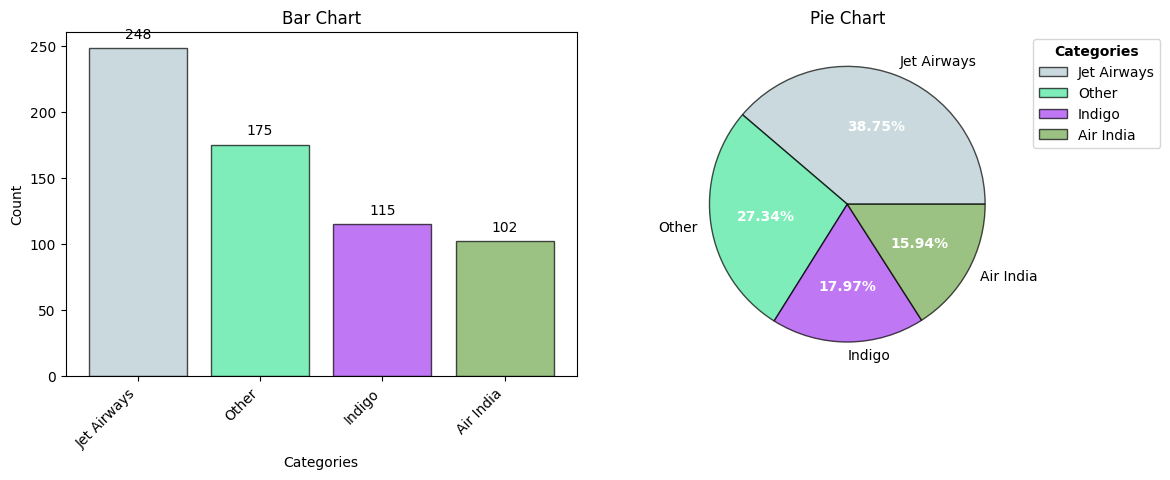

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

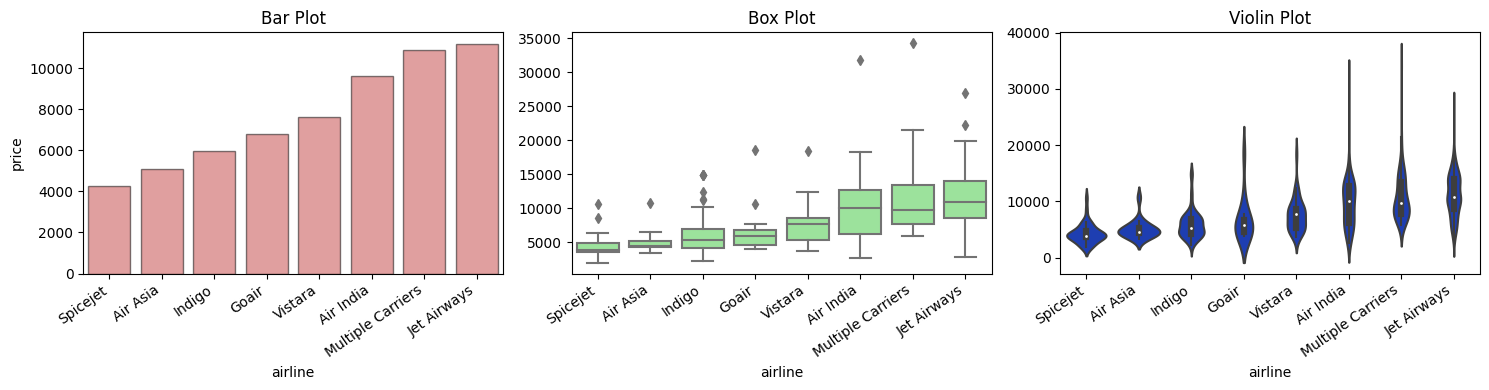

In [21]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 42.46553777098078
- p-value              : 3.970400260466922e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 247.4640193359857
- p-value              : 9.600459786744093e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


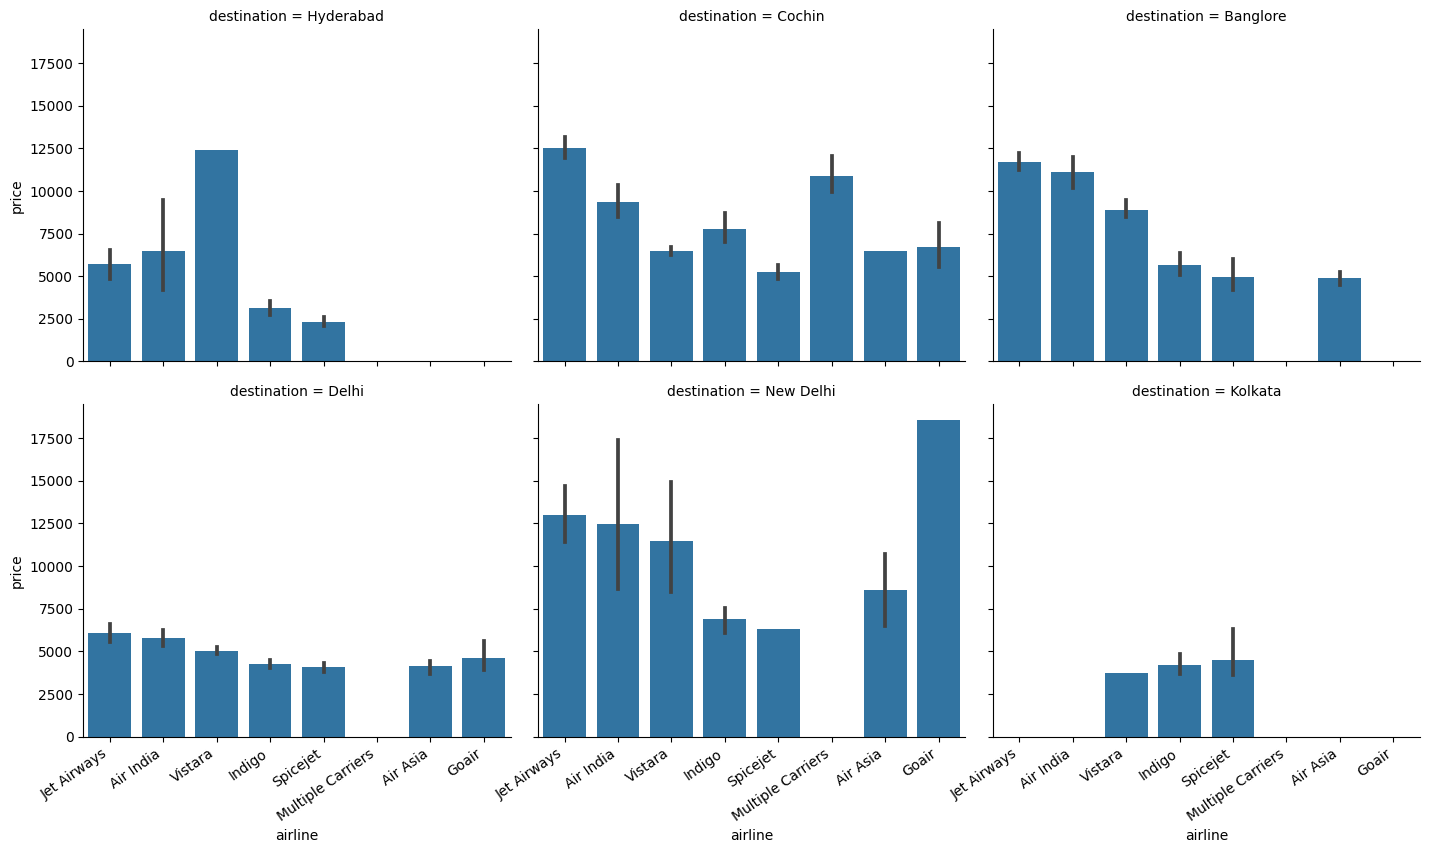

In [23]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [24]:
train.date_of_journey

0     2019-06-21
1     2019-05-18
2     2019-06-12
3     2019-04-01
4     2019-06-06
         ...    
635   2019-04-12
636   2019-05-09
637   2019-05-15
638   2019-05-15
639   2019-05-21
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

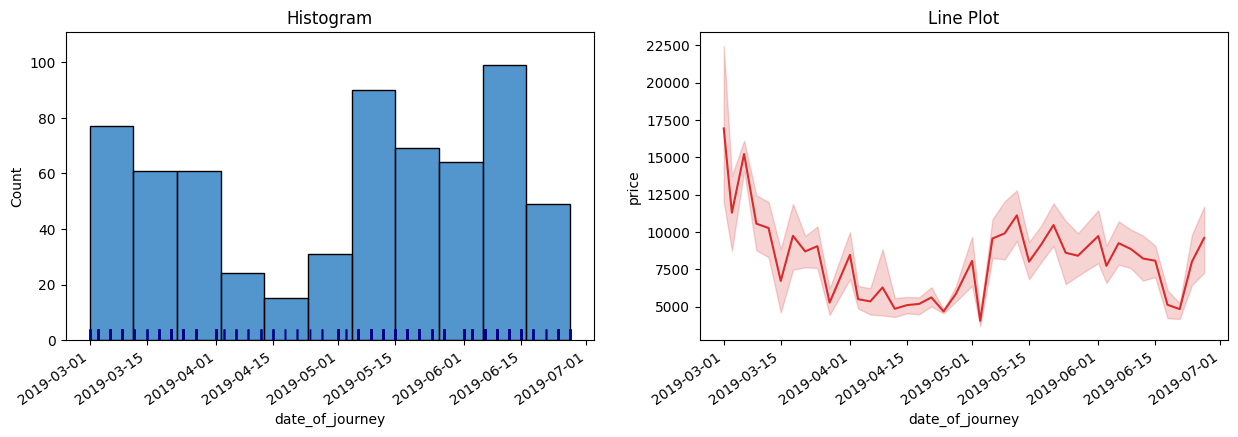

In [25]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

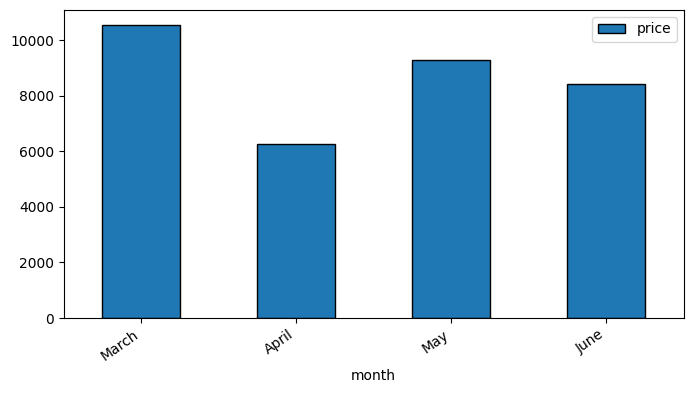

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

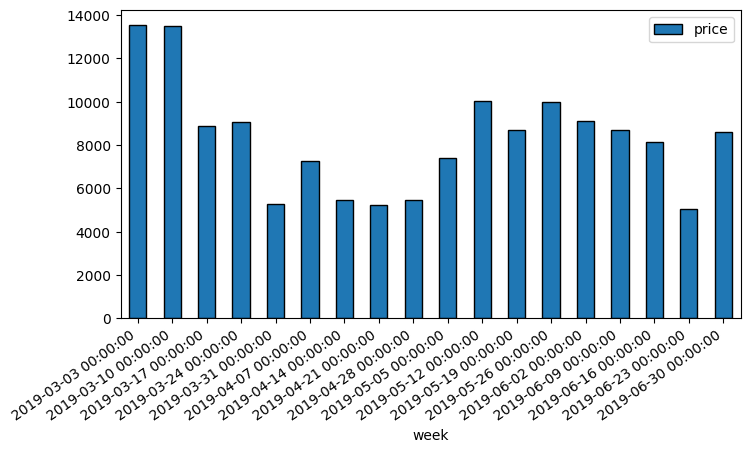

In [27]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

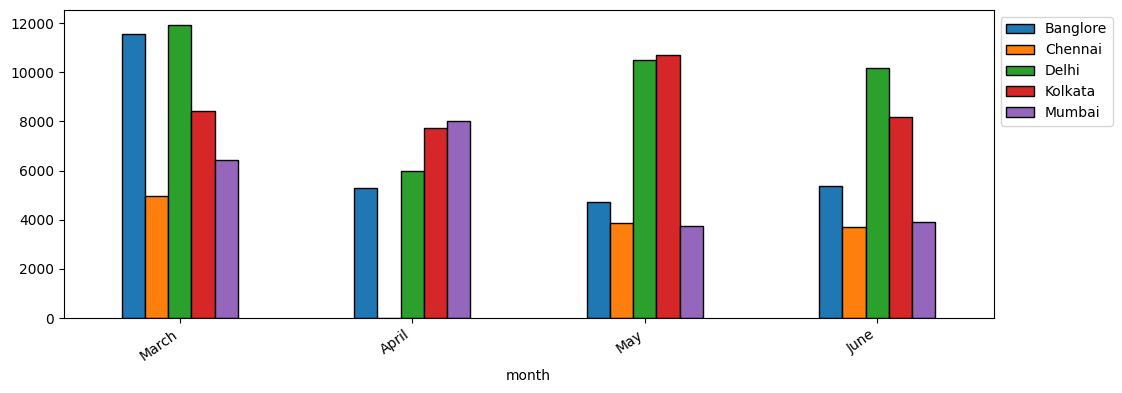

In [28]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [29]:
train.dep_time

0     2024-04-29 10:20:00
1     2024-04-29 09:00:00
2     2024-04-29 09:10:00
3     2024-04-29 20:20:00
4     2024-04-29 17:00:00
              ...        
635   2024-04-29 04:55:00
636   2024-04-29 09:35:00
637   2024-04-29 06:05:00
638   2024-04-29 08:45:00
639   2024-04-29 20:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

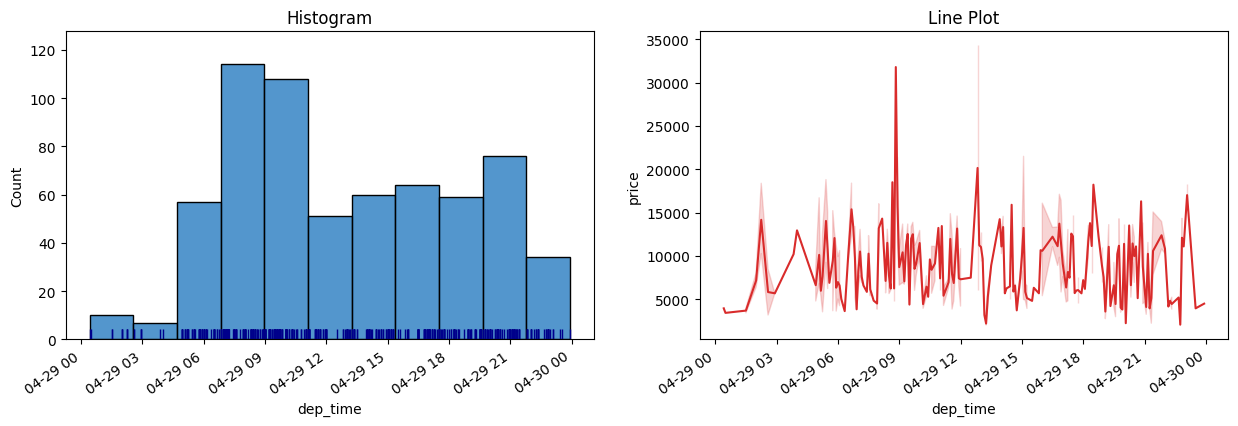

In [30]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

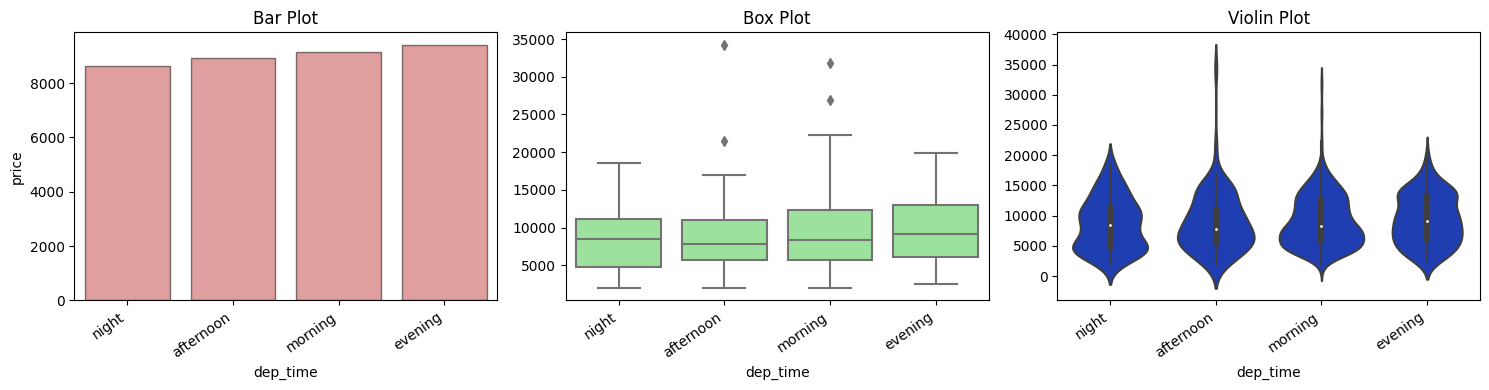

In [31]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [32]:
train.duration

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

In [33]:
eda_helper_functions.num_summary(train, "duration")

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,505.00
75,956.25
90,1456.50
95,1610.25
99,1795.00


,value
mean,639.773438
trimmed mean (5%),609.296875
trimmed mean (10%),581.650391
median,505.000000


,value
var,252052.100389
std,502.047906
IQR,781.250000
mad,335.000000
coef_variance,0.784728


,value
skewness,0.817873
kurtosis,-0.304506


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.780735990586756e-21
Test Statistic       : 0.8889472484588623
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.671347917330877
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [34]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.00
0.50    505.00
0.75    956.25
Name: duration, dtype: float64

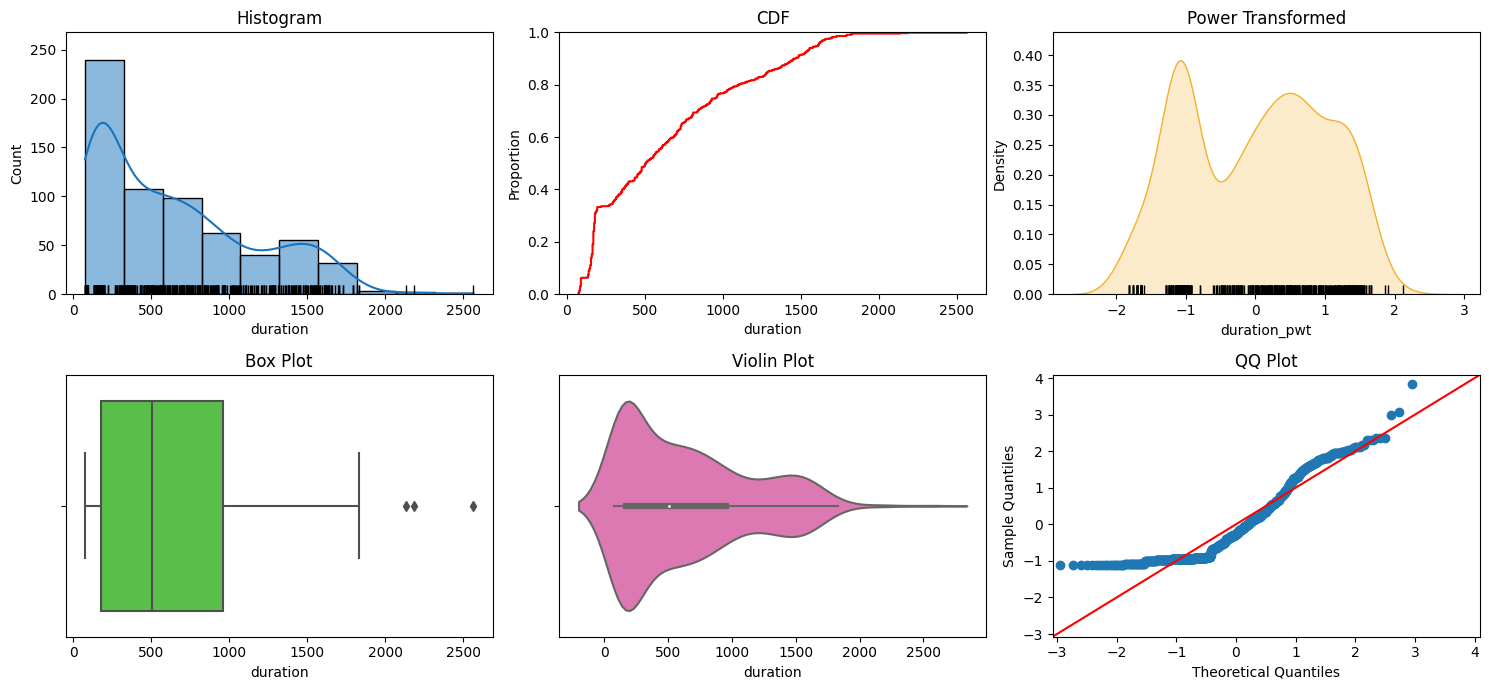

In [35]:
eda_helper_functions.num_univar_plots(train, "duration")

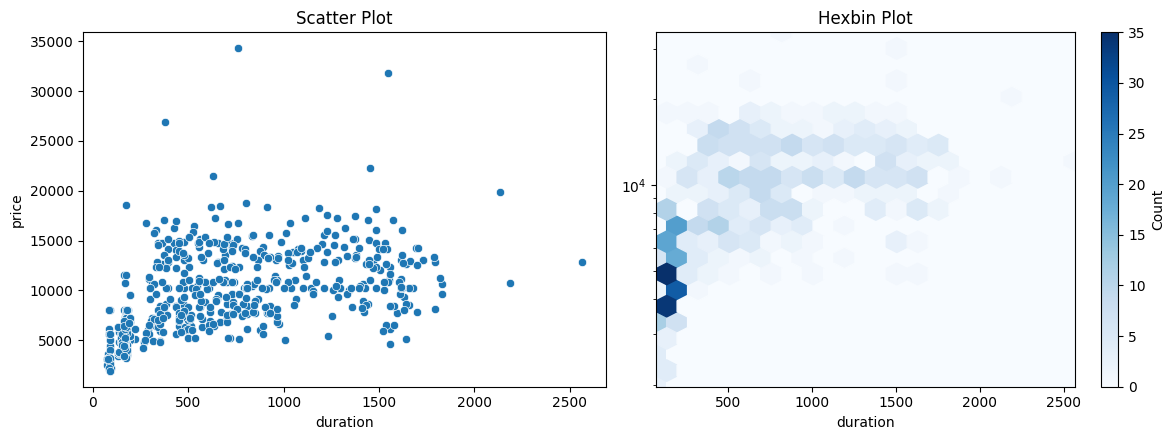

In [36]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [37]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5542220697543216
- p-value              : 8.234740030804429e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7020165273730767
- p-value              : 3.954255142414078e-96
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


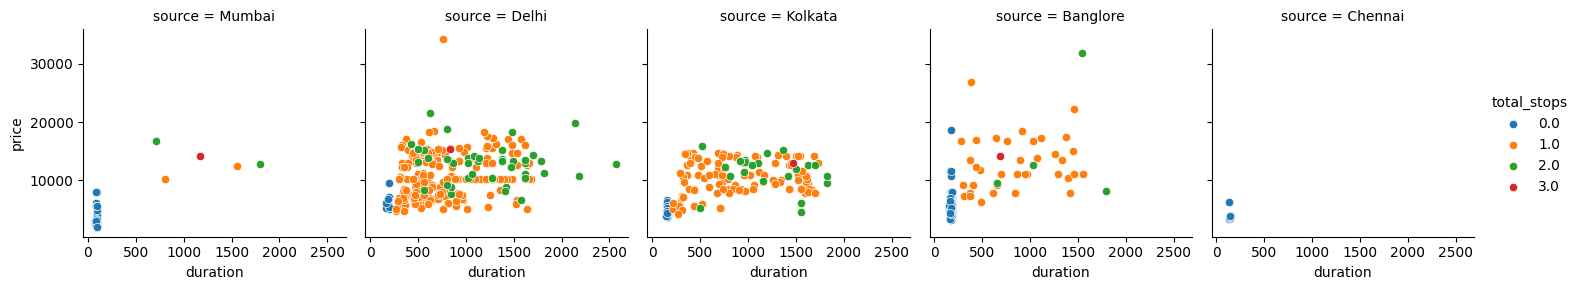

In [38]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

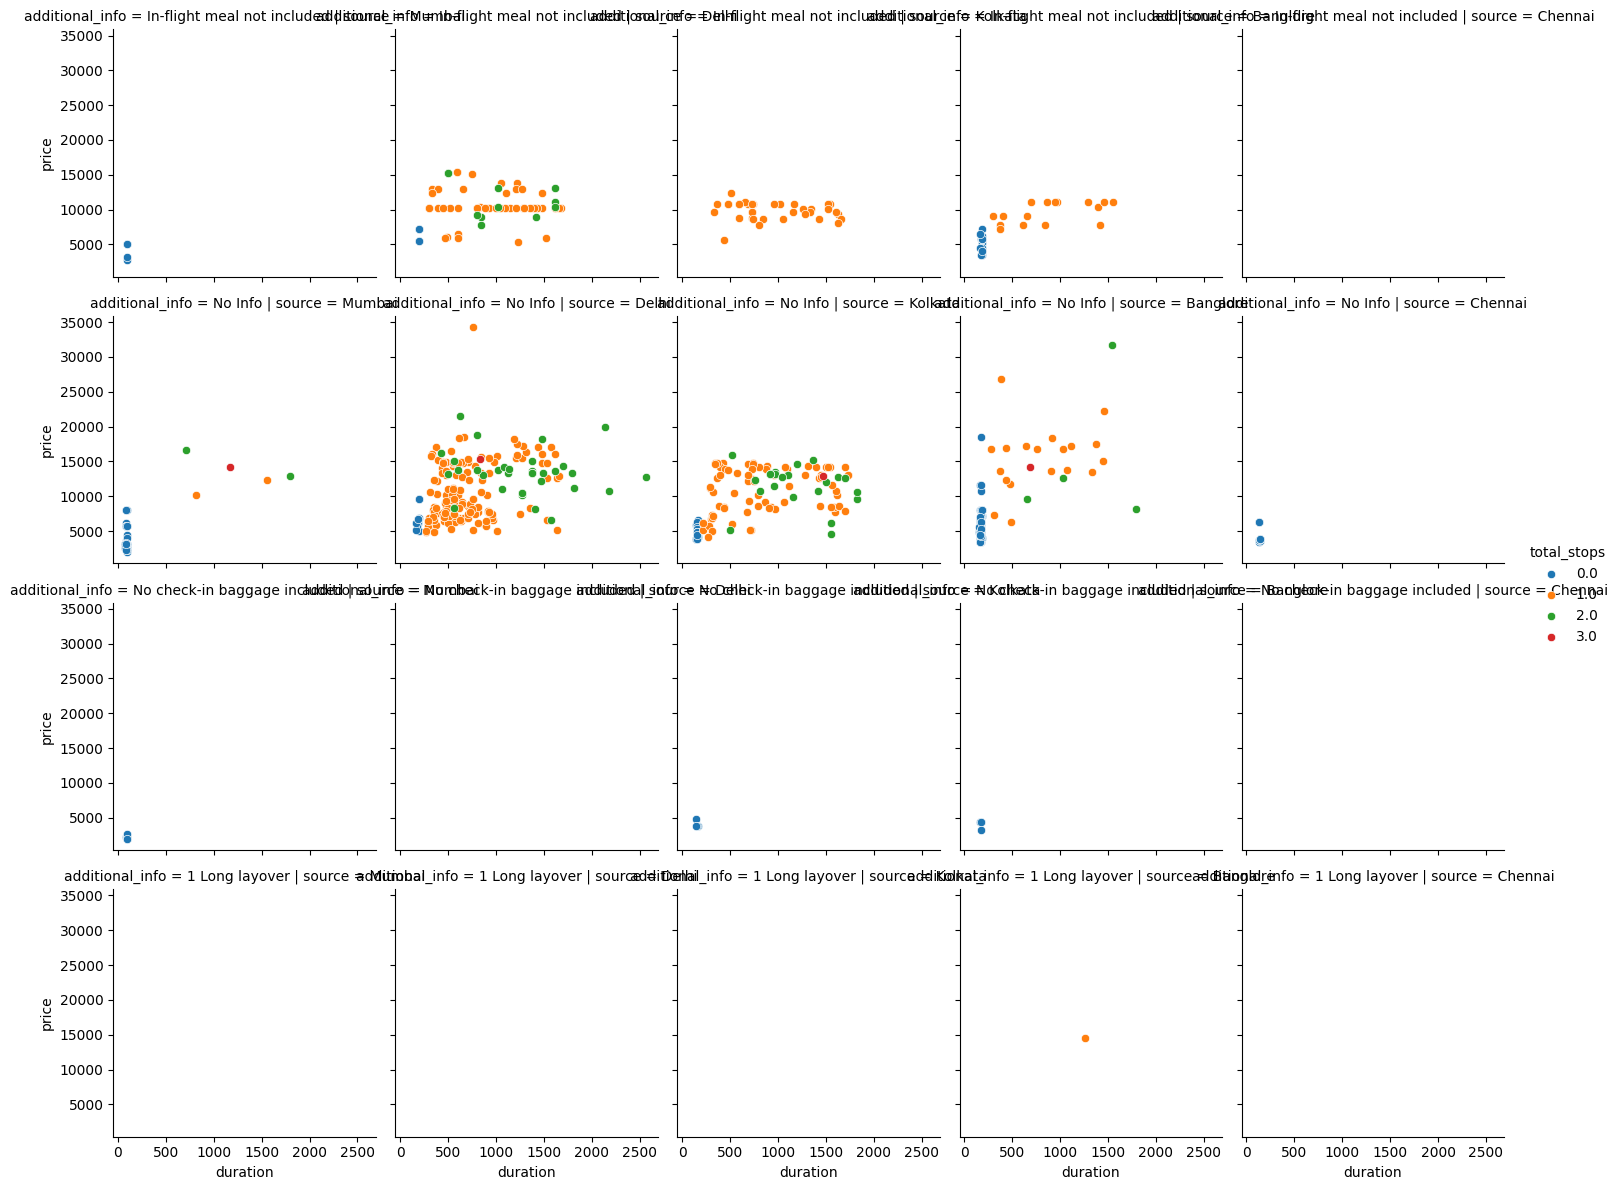

In [39]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [43]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -996.875
Upper Limit : 2128.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
377,Jet Airways,2019-03-06,Delhi,Cochin,2024-04-29 16:50:00,2024-04-29 04:25:00,2135,2.0,No Info,19907
294,Air India,2019-03-21,Delhi,Cochin,2024-04-29 06:50:00,2024-04-29 19:15:00,2185,2.0,No Info,10756
284,Jet Airways,2019-03-21,Delhi,Cochin,2024-04-29 09:40:00,2024-04-29 04:25:00,2565,2.0,No Info,12819


### 8.5 additional_info

In [44]:
eda_helper_functions.cat_summary(train, "additional_info")

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,488


,count,percentage
category,,
No Info,488,0.762500
In-flight meal not included,136,0.212500
No check-in baggage included,15,0.023438
1 Long layover,1,0.001563


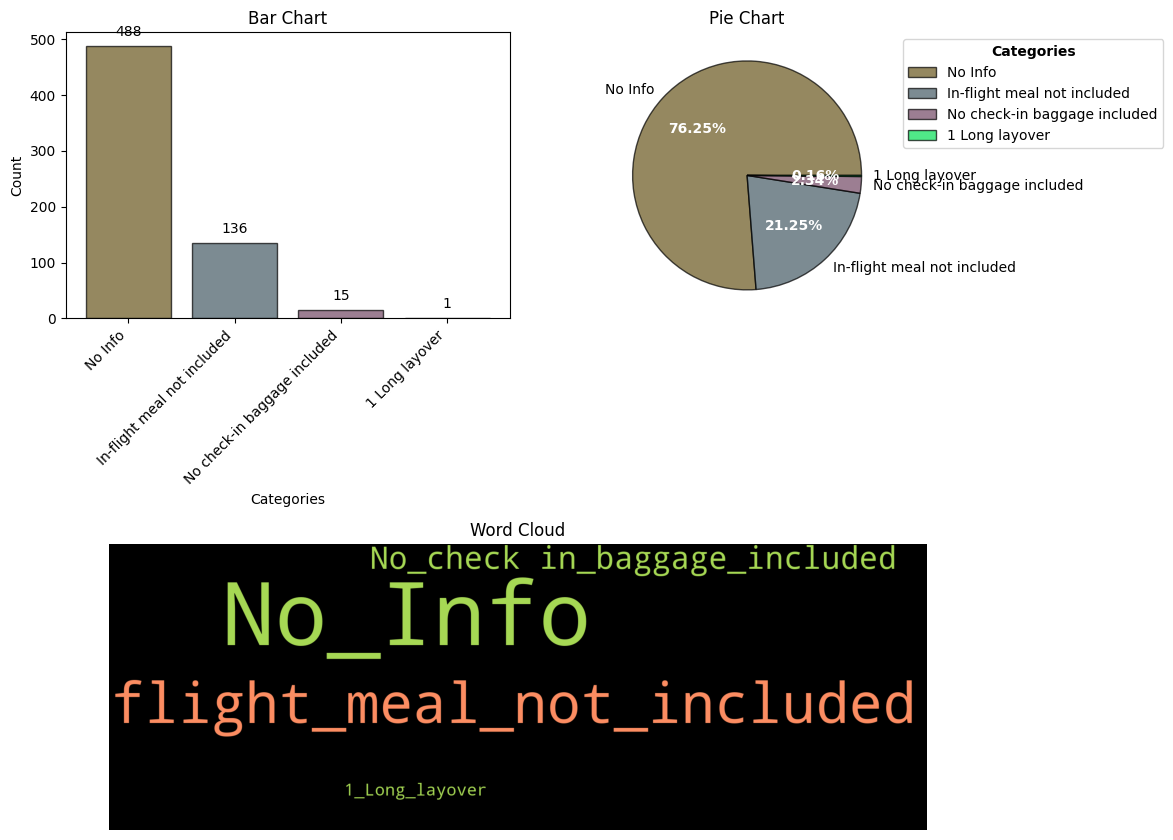

In [45]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

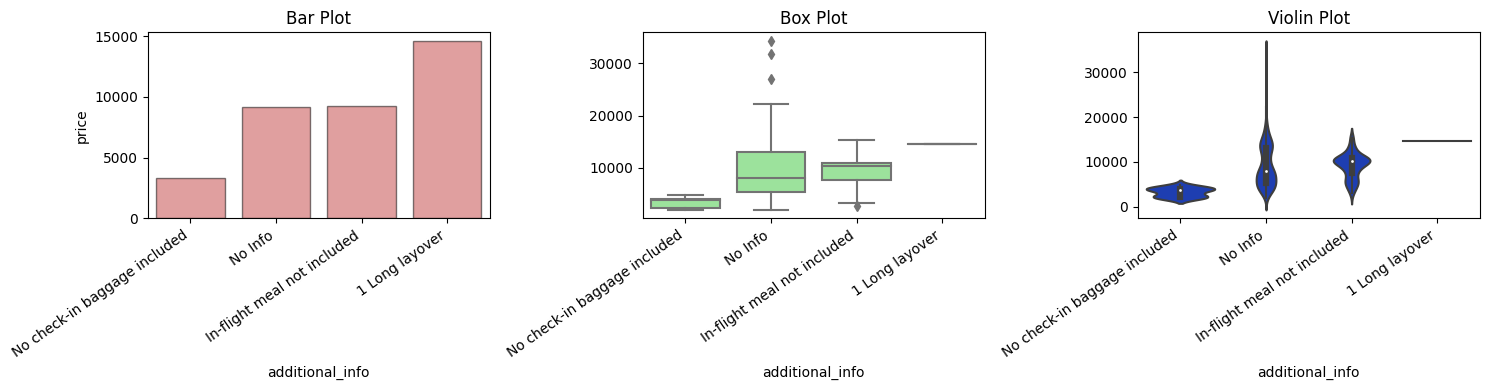

In [46]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

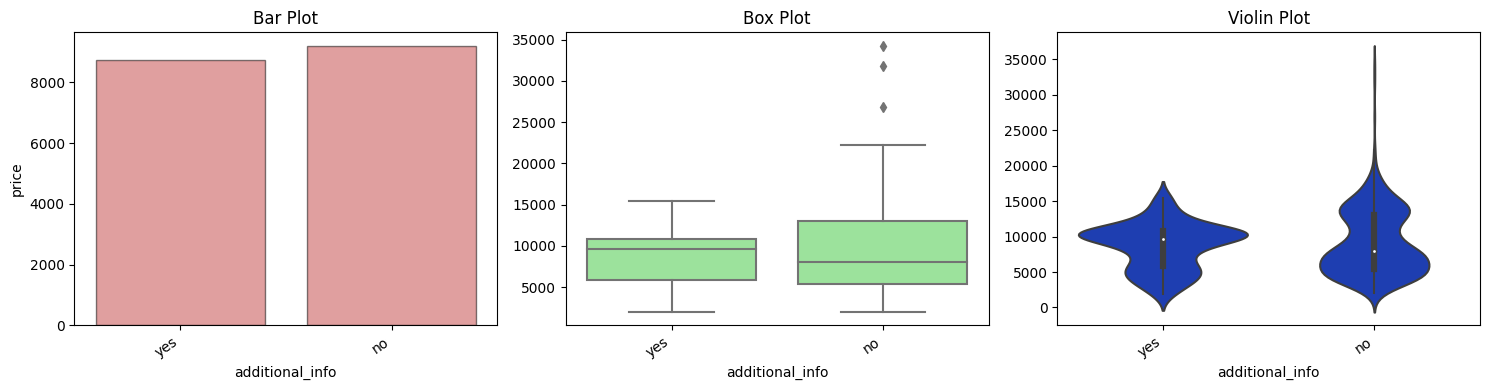

In [52]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

## 9. Automated EDA

In [40]:
from ydata_profiling import ProfileReport

In [41]:
report = ProfileReport(train)

In [42]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]